## Coin market price prediction and analysis
### Project Overvew:¶
The goal of this project is to collect coin data from the web.<br> Provide basic technical analysis for chosen coins.<br> Predict price based on past available data.<br>

<img src="coins.jpg" alt="Coins" width="500" height="600">

![alt text](coins.jpg "Coins")

<b>To learn about finace libraries used in this project check links:</b><br> 
<a> href="https://pypi.org/project/yfinance/">Yahoo finance project</a><br> 
To instal library Yfinance in terminal use:<br> 
$ pip install yfinance</br></b>

<a> href="https://pypi.org/project/yahoofinancials/">YahooFinancials</a><br>
To instal library YahooFinancials in terminal use:<br> 
$ pip install yahoofinancials

<a href="https://pypi.org/project/mpld3//">Interctive plots mpld3 library</a><br>
To instal library mpld3 in terminal use:<br> 
$ pip install mpld3


In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
from matplotlib.widgets import Cursor
import seaborn as sns

%matplotlib inline
#import mpld3
#mpld3.enable_notebook()

#Yahoo tools
import yfinance as yf
from yahoofinancials import YahooFinancials

## Load data from Yahoo Finance

In [2]:
# Create coins list to download data from yahoo finance. 
coin_ticker = ['BTC-USD', 'ETH-USD', 'XTZ-USD', 'XRP-USD', 'DOT1-USD', 'SOL1-USD']

In [3]:
"""Yahoo provide dictionary that include lots of finantial information for each coin. 
This cell might run for few seconds with more coins/assets)"""
# Collect summary information for coins
yahoo_financials = YahooFinancials(coin_ticker)
data=yahoo_financials.get_summary_data()

# Show the most interesting coin statistic
df_summary = pd.DataFrame(data=data)
df_summary.loc[['startDate', 'marketCap', 'circulatingSupply', 'maxSupply', 'volume', 'averageDailyVolume10Day','averageVolume','open', 'fiftyTwoWeekHigh','fiftyTwoWeekLow']]

,BTC-USD,ETH-USD,XTZ-USD,XRP-USD,DOT1-USD,SOL1-USD
startDate,2013-04-28,2015-08-07,2017-10-06,2013-08-04,2020-08-19,2020-04-10
marketCap,1230471954432,556375212032,5129255424,56268271616,46197547008,73497141248
circulatingSupply,18874012,118352208,867042304,47158976512,987579328,303212064
maxSupply,None,None,None,None,None,None
volume,27790944256,15239779328,132251296,2658200320,1061728576,2171561216
averageDailyVolume10Day,34420306748,16880934557,252351183,4200989389,1792669610,2902796132
averageVolume,35868070337,19694192032,623213939,4491452809,2316669999,3781488631
open,65834.53,4642.239,5.851763,1.194046,46.568413,238.81892
fiftyTwoWeekHigh,68789.625,4859.503,9.175448,1.964997,55.004974,260.0621
fiftyTwoWeekLow,15880.706,445.50162,1.644792,0.174831,4.345864,1.090161


In [4]:
#Set period for  data collection (last 2 years)
period = '2y'

# Function that will create dataframe for chosed coins
df_list = list()
for ticker in coin_ticker:
    data = yf.download(ticker, group_by="Ticker", period=period)
    data['coin_ticker'] = ticker  
    df_list.append(data)
    
    

# Combine data into a single dataframe
df = pd.concat(df_list)

# Save df to csv
basename = "coins"
suffix = datetime.now().strftime("%y%m%d_%H%M%S")
filename = "_".join([basename, suffix])
df.to_csv(filename)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## Data pre-processing

In [5]:
# Print df shape
print(f'Data frame include: {df.shape[0]} lines in columns: {df.shape[1]}')

# Print first 3 lines of df
df.head(3) 

Data frame include: 3899 lines in columns: 7


,Open,High,Low,Close,Adj Close,Volume,coin_ticker
Date,,,,,,,
2019-11-15,8705.708008,8730.873047,8484.843750,8491.992188,8491.992188,21796856471,BTC-USD
2019-11-16,8491.166016,8591.997070,8473.973633,8550.760742,8550.760742,16495389808,BTC-USD
2019-11-17,8549.470703,8727.789062,8500.967773,8577.975586,8577.975586,18668638897,BTC-USD


In [6]:
# Move coin tracker to the front of df
df = df[ ['coin_ticker'] + [ col for col in df.columns if col != 'coin_ticker' ]]

# Adding new columns Volume in Bilions, aily difference in value and procentage to support next visualisations
df['Volume_in_Bln'] = df['Volume']/1e9
df['daily_diff'] = (df['Close'] - df['Open'])
df['daily_proc_diff'] = ((df['Close'] / df['Open']))-1

df.tail()

,coin_ticker,Open,High,Low,Close,Adj Close,Volume,Volume_in_Bln,daily_diff,daily_proc_diff
Date,,,,,,,,,,
2021-11-11,SOL1-USD,233.913986,246.447189,229.748520,234.240753,234.240753,2693456862,2.693457,0.326767,0.001397
2021-11-12,SOL1-USD,233.721268,238.695679,221.252945,228.502090,228.502090,3022054714,3.022055,-5.219177,-0.022331
2021-11-13,SOL1-USD,228.596252,241.825027,225.075928,241.825027,241.825027,2322796265,2.322796,13.228775,0.057870
2021-11-14,SOL1-USD,241.862106,242.044891,230.689407,238.425522,238.425522,1705211600,1.705212,-3.436584,-0.014209
2021-11-15,SOL1-USD,238.818924,245.909668,238.818924,242.395187,242.395187,2171561216,2.171561,3.576263,0.014975


In [7]:
# Show df basic informations
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3899 entries, 2019-11-15 to 2021-11-15
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   coin_ticker      3899 non-null   object 
 1   Open             3899 non-null   float64
 2   High             3899 non-null   float64
 3   Low              3899 non-null   float64
 4   Close            3899 non-null   float64
 5   Adj Close        3899 non-null   float64
 6   Volume           3899 non-null   int64  
 7   Volume_in_Bln    3899 non-null   float64
 8   daily_diff       3899 non-null   float64
 9   daily_proc_diff  3899 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 335.1+ KB


## Visualizations

C:\Users\Piotr\AppData\Local\Temp/ipykernel_7444/3464407728.py:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(len(coin_ticker)/2, 2, num)


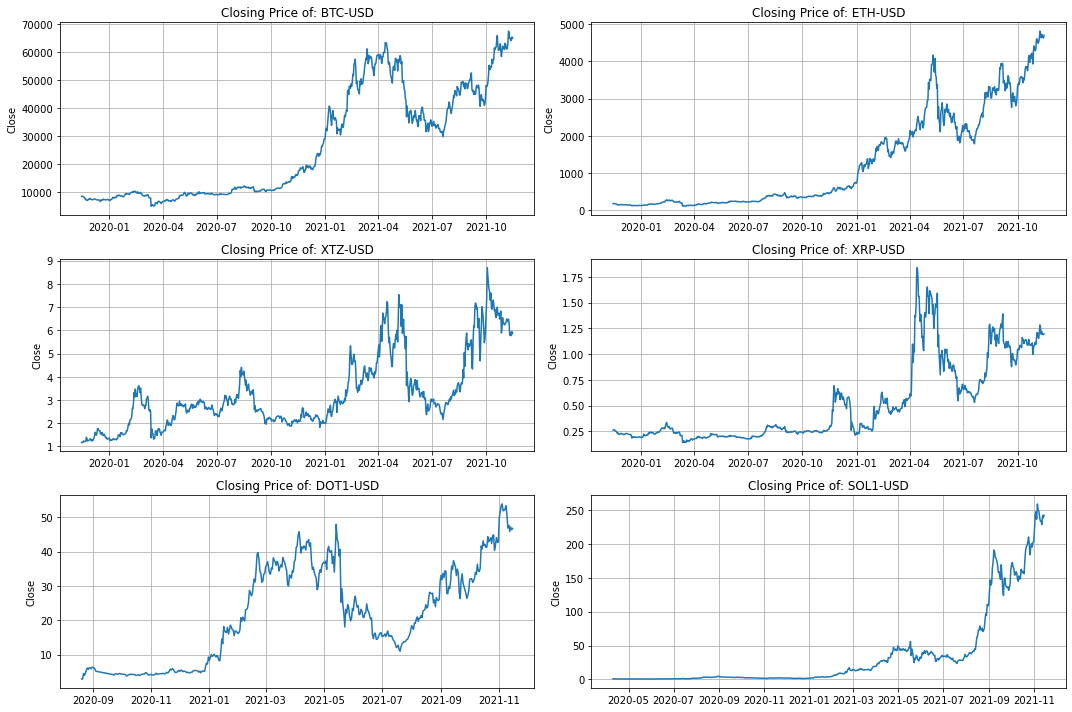

In [8]:
# Plot close price for all coins.
fig = plt.figure(figsize=(15, 10))

for c, num in zip(coin_ticker, range(1, len(coin_ticker)+1)):
    df1 = df[df['coin_ticker']==c]
    ax = fig.add_subplot(len(coin_ticker)/2, 2, num)
    ax.plot(df1['Close'])
    ax.set_title(f"Closing Price of: {c}")
    plt.ylabel('Close')
    plt.grid()
    
plt.tight_layout()
plt.show()

C:\Users\Piotr\AppData\Local\Temp/ipykernel_7444/3960774893.py:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(len(coin_ticker)/2, 2, num)


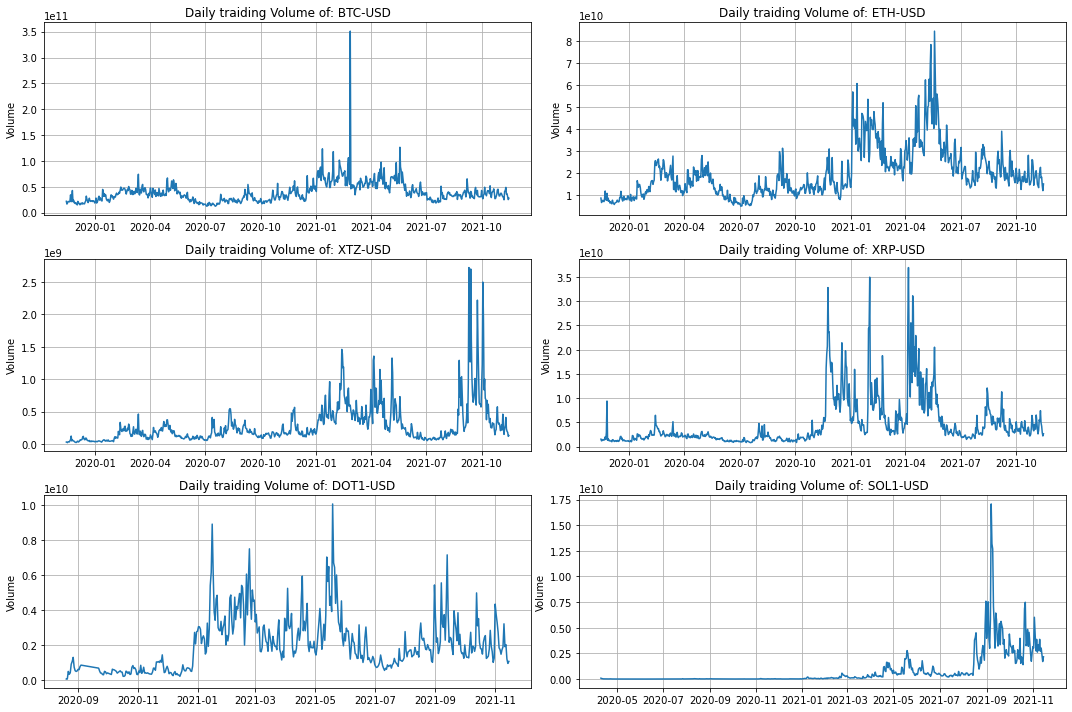

In [9]:
# Plot Volume for all coins. 
fig = plt.figure(figsize=(15, 10))

for c, num in zip(coin_ticker, range(1, len(coin_ticker)+1)):
    df1 = df[df['coin_ticker']==c]
    ax = fig.add_subplot(len(coin_ticker)/2, 2, num)
    ax.plot(df1['Volume'])
    ax.set_title(f"Daily traiding Volume of: {c}")
    plt.ylabel('Volume')
    plt.grid()

plt.tight_layout()
plt.show()

C:\Users\Piotr\AppData\Local\Temp/ipykernel_7444/2969578928.py:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(len(coin_ticker)/2, 2, num)


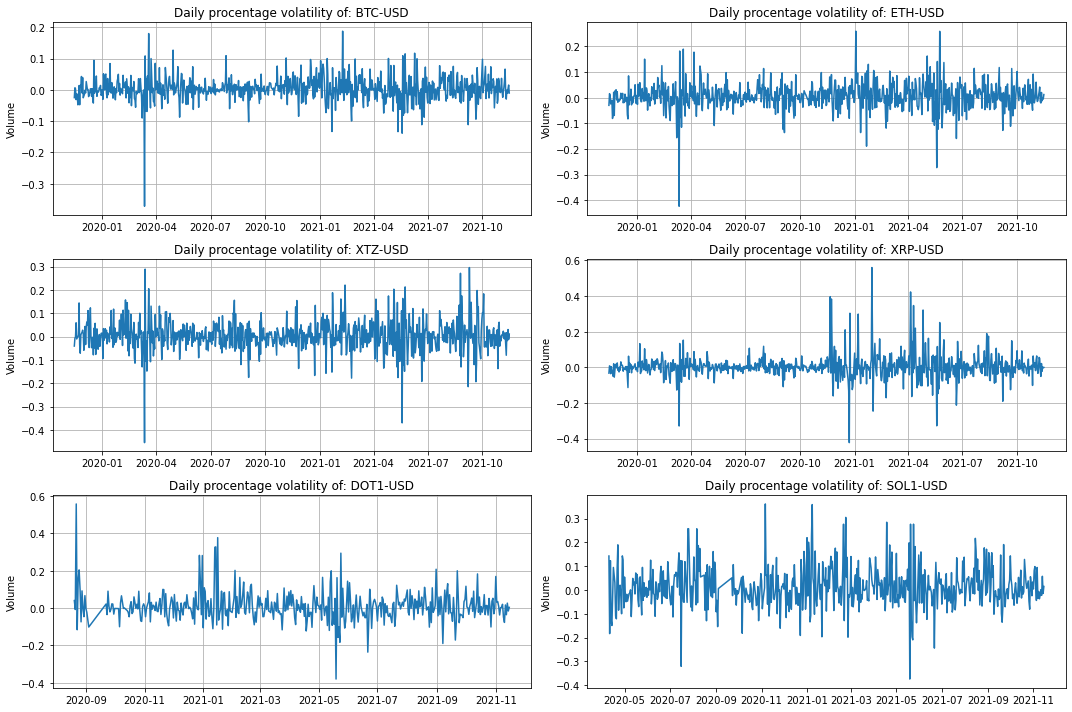

In [10]:
# Plot daily volatility for all coins. 
fig = plt.figure(figsize=(15, 10))

for c, num in zip(coin_ticker, range(1, len(coin_ticker)+1)):
    df1 = df[df['coin_ticker']==c]
    ax = fig.add_subplot(len(coin_ticker)/2, 2, num)
    ax.plot(df1['daily_proc_diff'])
    ax.set_title(f"Daily procentage volatility of: {c}")
    plt.ylabel('Volume')
    plt.grid()

plt.tight_layout()
plt.show()

In [11]:
# Show top 10 days for all coins profit
df.sort_values(by='daily_proc_diff', ascending = False).head(10)

,coin_ticker,Open,High,Low,Close,Adj Close,Volume,Volume_in_Bln,daily_diff,daily_proc_diff
Date,,,,,,,,,,
2021-01-30,XRP-USD,0.282152,0.489346,0.279825,0.440244,0.440244,24417465997,24.417466,0.158092,0.560308
2020-08-22,DOT1-USD,2.878570,4.510613,2.816762,4.484690,4.484690,485801096,0.485801,1.606120,0.557958
2021-04-05,XRP-USD,0.646703,0.936855,0.633974,0.920473,0.920473,26415199263,26.415199,0.273770,0.423332
2020-11-21,XRP-USD,0.328068,0.463057,0.328068,0.458344,0.458344,16206296041,16.206296,0.130276,0.397101
2020-11-23,XRP-USD,0.443701,0.614969,0.434732,0.613980,0.613980,20715303968,20.715304,0.170279,0.383770
2021-01-16,DOT1-USD,13.198050,19.322062,13.185754,18.180424,18.180424,8917081506,8.917082,4.982374,0.377508
2020-11-06,SOL1-USD,1.405218,1.940707,1.400011,1.913740,1.913740,22547497,0.022547,0.508522,0.361881
2021-01-08,SOL1-USD,2.368740,3.779320,2.180929,3.219887,3.219887,206412154,0.206412,0.851147,0.359325
2021-04-10,XRP-USD,1.020282,1.389957,1.008636,1.374416,1.374416,25547794935,25.547795,0.354134,0.347094


In [12]:
# Show top 10 days for all coins loses.
df.sort_values(by='daily_proc_diff').head(10)

,coin_ticker,Open,High,Low,Close,Adj Close,Volume,Volume_in_Bln,daily_diff,daily_proc_diff
Date,,,,,,,,,,
2020-03-12,XTZ-USD,2.509758,2.510685,1.364065,1.368093,1.368093,281543680,0.281544,-1.141665,-0.454890
2020-03-12,ETH-USD,194.738922,195.147934,111.210709,112.347122,112.347122,22134741655,22.134742,-82.391800,-0.423089
2020-12-23,XRP-USD,0.447966,0.447966,0.221363,0.258602,0.258602,19793483656,19.793484,-0.189364,-0.422720
2021-05-19,DOT1-USD,40.688820,41.340519,18.635315,25.227142,25.227142,10069997172,10.069997,-15.461678,-0.379998
2021-05-19,SOL1-USD,56.089256,57.525772,29.429859,35.107182,35.107182,2772224999,2.772225,-20.982075,-0.374084
2020-03-12,BTC-USD,7913.616211,7929.116211,4860.354004,4970.788086,4970.788086,53980357243,53.980357,-2942.828125,-0.371869
2021-05-19,XTZ-USD,5.745758,5.838486,2.888095,3.618687,3.618687,731846127,0.731846,-2.127071,-0.370199
2020-03-12,XRP-USD,0.208205,0.209124,0.139635,0.139635,0.139635,3547958418,3.547958,-0.068570,-0.329339
2021-05-19,XRP-USD,1.593270,1.644380,0.875318,1.070313,1.070313,20523476458,20.523476,-0.522957,-0.328229


In [13]:
# Calculate Moving averages 20, 50, 200 days for close price 

ma_days = [20, 50, 200]

for ma in ma_days:
    #for c in df['coin_ticker']:
    column_name = f"MA for {ma} days"
    df[column_name] = df.groupby('coin_ticker')['Close'].transform(lambda x: x.rolling(ma).mean()-x.iat[0])     

C:\Users\Piotr\AppData\Local\Temp/ipykernel_7444/4073300967.py:5: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(len(coin_ticker)/2, 2, num)


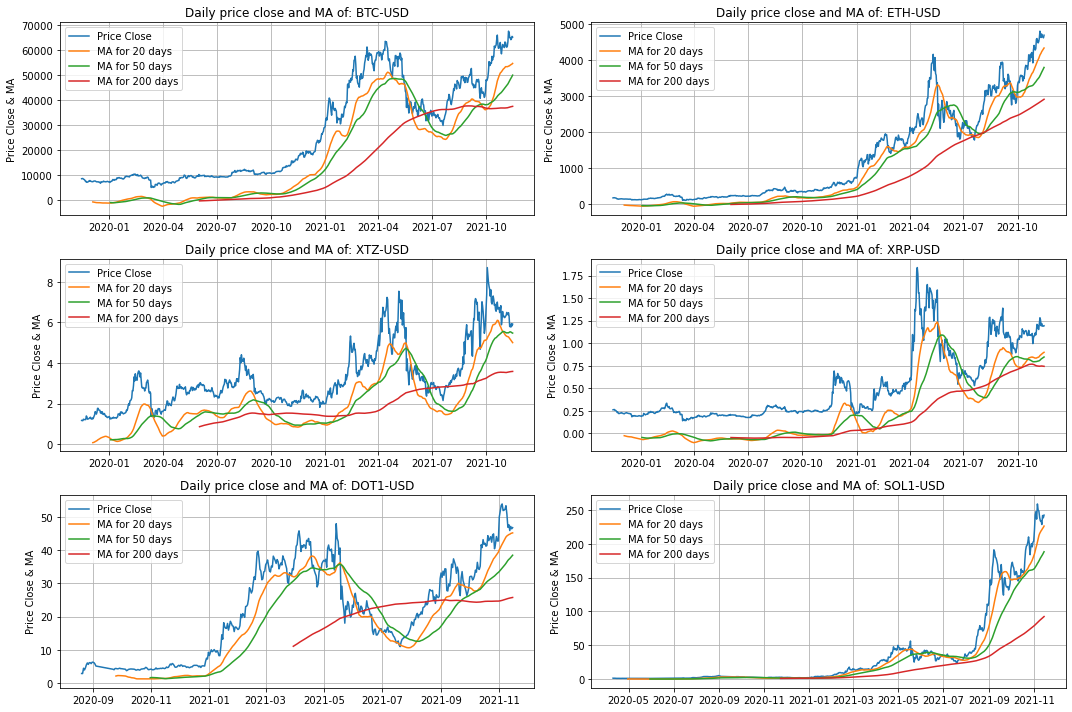

In [14]:
fig = plt.figure(figsize=(15, 10))

for c, num in zip(coin_ticker, range(1, len(coin_ticker)+1)):
    df1 = df[df['coin_ticker']==c]
    ax = fig.add_subplot(len(coin_ticker)/2, 2, num)
    ax.plot(df1[['Close', 'MA for 20 days', 'MA for 50 days', 'MA for 200 days' ]])
    ax.set_title(f'Daily price close and MA of: {c}')
    plt.ylabel('Price Close & MA')
    ax.legend(['Price Close', 'MA for 20 days', 'MA for 50 days', 'MA for 200 days'])
    plt.grid()

plt.tight_layout()
plt.show()

## Visualization end day price similarity betwen coins

In [15]:
# Transform data frame to calculate correlation betwen coins
close_df = df.loc[:, ['coin_ticker', 'Close']]
close_df = pd.pivot_table(close_df, values='Close', index='Date', columns = 'coin_ticker')

# Let's take a quick look
close_df.head(3)

coin_ticker,BTC-USD,DOT1-USD,ETH-USD,SOL1-USD,XRP-USD,XTZ-USD
Date,,,,,,
2019-11-15,8491.992188,NaN,180.521179,NaN,0.261654,1.172053
2019-11-16,8550.760742,NaN,183.348358,NaN,0.263886,1.163438
2019-11-17,8577.975586,NaN,185.119232,NaN,0.265253,1.162535


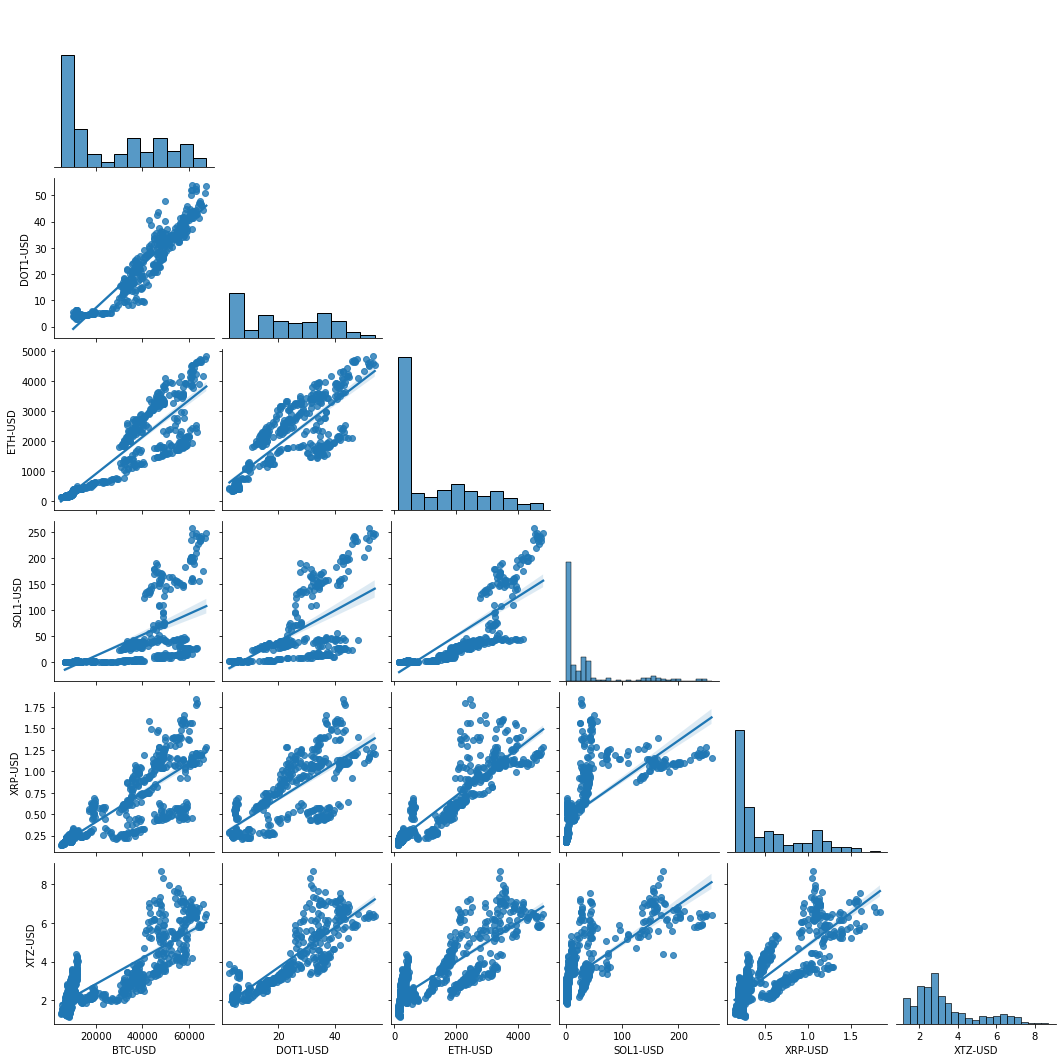

In [16]:
# Show Pairplot visualizes to find the similarity between coins
sns.pairplot(close_df, kind='reg', corner=True)

Plot analsisis:
The end day price for some of the coins are showing quite strong linear relations. This can be observed for BTC and DOT, BTC and ETR, ETH and DOT, XRP and ETR. Solana is very different as price showing more exponential grow. XRP after exponential grow price droped and is now slowly moving up side ways. 

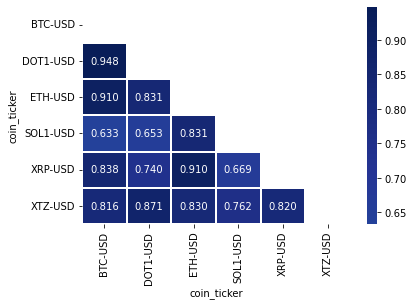

In [17]:
# Create the correlation matrix for numerical values in DF.
corr = close_df.corr()

# Generate a mask for the upper triangle 
mask = np.triu(np.ones_like(corr, dtype=bool)) # - mask reduce duplication on chart its more readable

# Add the mask to the heatmap
sns.heatmap(corr, mask=mask, center=0, linewidths=2, cmap="YlGnBu", annot=True, fmt=".3f")
plt.show()

All coins end day close prices are correlated above 60%. Very intersting correlactions above 90 are betwen BTC and DOT and ETH, another intrsting is correlation betwen ETH and XRP. This correlaction strongly suggest that those cons prices follow each other. We already knoe that the biggies market cap coin is BTC and apart of SOL coin rest coins are colrelated above 80%. That suggest that BTC is leading this con group.

#lets do this for price difference %

## Visualization daily price  changes similarity betwen coins

In [18]:
# Transform data frame to calculate correlation betwen coins
daily_proc_df = df.loc[:, ['coin_ticker', 'daily_proc_diff']]
daily_proc_df = pd.pivot_table(daily_proc_df, values='daily_proc_diff', index='Date', columns = 'coin_ticker')

# Let's take a quick look
daily_proc_df.head(3)

coin_ticker,BTC-USD,DOT1-USD,ETH-USD,SOL1-USD,XRP-USD,XTZ-USD
Date,,,,,,
2019-11-15,-0.024549,NaN,-0.029759,NaN,-0.032570,-0.040929
2019-11-16,0.007018,NaN,0.015785,NaN,0.008376,-0.007575
2019-11-17,0.003334,NaN,0.009645,NaN,0.004712,-0.000776


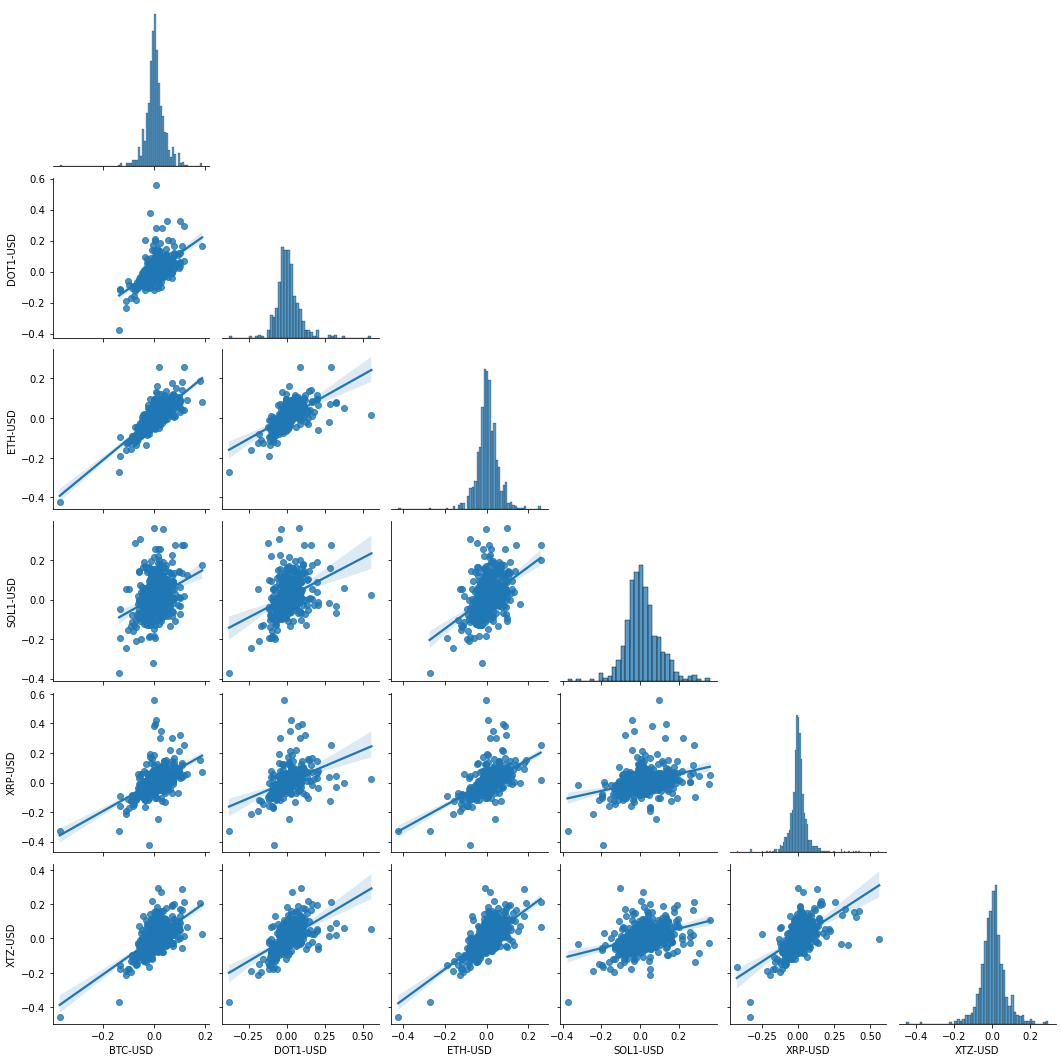

In [19]:
# Show Pairplot visualizes to find the similarity between coins
sns.pairplot(daily_proc_df, kind='reg', corner=True)

The majority daily percentage price difference between price open and close are range -20% to +20%. There is also a very high concentration for price change between -10% to +10%. This price difference is what all coin investors should accept and be prepared for. The distribution plot drawn to show the marginal distribution for all coins daily prices change is revealing normal distribution. They are significantly high outliers that also showing how strong price changes we can observe -40% 0r +40% . These we call game-changer days but they are quite rare to observe. Some of the coins are exhibit a stronger relationship between their prices daily change BTC and ETH, also XTZ and ETH, XRP and ETH

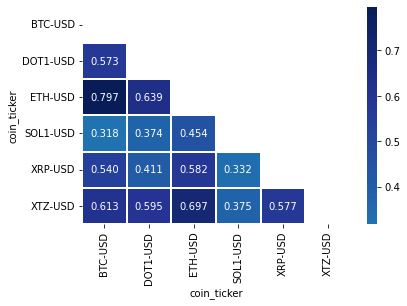

In [20]:
# Create the correlation matrix for numerical values in DF.
corr = daily_proc_df.corr()

# Generate a mask for the upper triangle 
mask = np.triu(np.ones_like(corr, dtype=bool)) # - mask reduce duplication on chart its more readable

# Add the mask to the heatmap
sns.heatmap(corr, mask=mask, center=0, linewidths=2, cmap="YlGnBu", annot=True, fmt=".3f")
plt.show()

The daily procentage price difference is showing lower correltationthen end price betwen the coins. There are few already noticed on pari plots that showing strong correlation BTC and ETH - 79.7%, anotherintresting pair is ETH and XTZ - 69.5%, the last one ETH and DOT - 63.9% 

## Stock price prediction LSTM model

In [46]:
# Create coin object using yahoo asset ticker
coin = 'ETH-USD'

# Adjust start date for collecion of data from yahoo to first day of coin on yahoo
start_df = df_summary.loc[['startDate']]
start = str(start_df.iloc[0][coin])

data = yf.download(coin, start=start, end=datetime.now())

# Create data frame
df = data

# save to csv
basename = (f'coin{coin}')
suffix = datetime.now().strftime("%y%m%d_%H%M%S")
filename = "_".join([basename, suffix])
df.to_csv(filename)


[*********************100%***********************]  1 of 1 completed


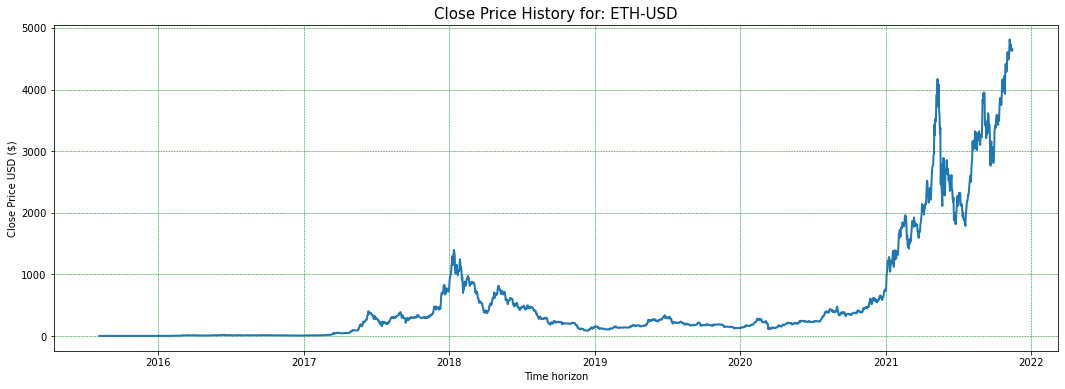

In [47]:
# Plot price close for coin
plt.figure(figsize=(18,6))
plt.title(f'Close Price History for: {coin}', fontsize=15)
plt.plot(df['Close'], linewidth = 2)
plt.xlabel('Time horizon', fontsize=10)
plt.ylabel('Close Price USD ($)', fontsize=10)
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

plt.show()

In [48]:
# Create a new dataframe with only the Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .80 ))

print(len(data))
print(training_data_len)

2289
2175


In [49]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[4.85756394e-04],
       [6.61926405e-05],
       [5.55044290e-05],
       ...,
       [9.66617092e-01],
       [9.61400265e-01],
       [9.66644796e-01]])

In [50]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([4.85756394e-04, 6.61926405e-05, 5.55044290e-05, 5.68659087e-05,
       1.31562078e-04, 1.62649111e-04, 2.89472475e-04, 2.89514048e-04,
       2.60632076e-04, 2.35096157e-04, 1.59774825e-04, 1.35550303e-04,
       1.71257376e-04, 2.14082590e-04, 1.99611465e-04, 1.96273736e-04,
       1.90737164e-04, 1.65523372e-04, 1.46594335e-04, 1.50707278e-04,
       1.48155118e-04, 1.57233095e-04, 1.55397952e-04, 1.83812319e-04,
       1.91911406e-04, 1.90533488e-04, 1.78724673e-04, 1.72518901e-04,
       1.74489118e-04, 1.87873284e-04, 1.78940811e-04, 1.68719784e-04,
       1.67842745e-04, 1.60377529e-04, 1.51910606e-04, 1.13921149e-04,
       1.25510110e-04, 1.04158400e-04, 9.16094774e-05, 1.05905616e-04,
       9.81671059e-05, 9.13203889e-05, 8.70503467e-05, 9.30162709e-05,
       1.04665906e-04, 1.00634448e-04, 9.70491904e-05, 9.53055048e-05,
       7.87216065e-05, 6.26383516e-05, 7.29759703e-05, 5.94411219e-05,
       3.07705059e-05, 4.70351891e-05, 6.31415096e-05, 5.30765659e-05,
     

In [53]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=25))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)# changed to 5(add batch_size )

Epoch 1/5
2115/2115 [==============================] - 144s 65ms/step - loss: 0.0024
Epoch 2/5
2115/2115 [==============================] - 139s 66ms/step - loss: 0.0013
Epoch 3/5
2115/2115 [==============================] - 130s 61ms/step - loss: 0.0012
Epoch 4/5
2115/2115 [==============================] - 120s 57ms/step - loss: 0.0011
Epoch 5/5
2115/2115 [==============================] - 119s 56ms/step - loss: 8.1953e-04


In [52]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

246.000359565658

C:\Users\Piotr\AppData\Local\Temp/ipykernel_7444/2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


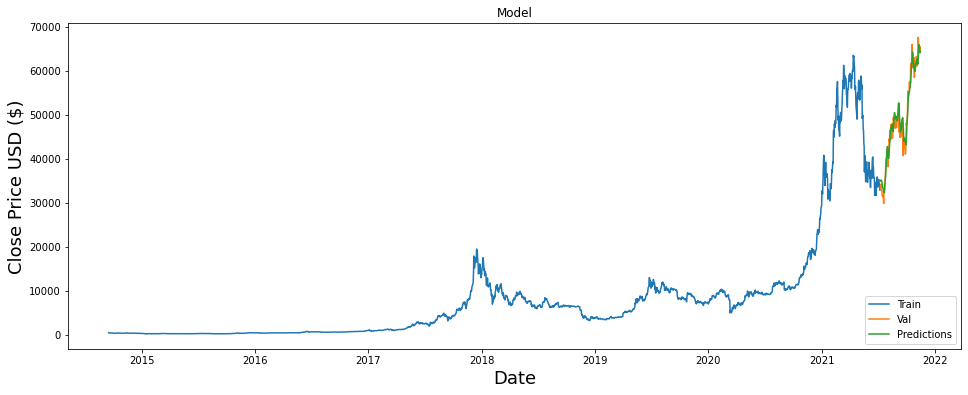

In [44]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [31]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-10-26,44.883873,40.136787
2021-10-27,40.410454,40.351627
2021-10-28,41.861691,40.153843
2021-10-29,44.073624,39.908222
2021-10-30,42.747833,39.845604
2021-10-31,42.742096,39.753605
2021-11-01,49.982254,39.665524
2021-11-02,51.631351,40.253624
2021-11-03,53.443703,41.261700


In [34]:
len(valid)

21

In [33]:
"""#RSI  - drop for now

# Window length for moving average
window_length = 14

# Get data
for c, num in zip(coin_ticker, range(1, len(coin_ticker)+1)):
    df1 = df[df['coin_ticker']==c]
    
    # Get just the adjusted close
    close = df1['Adj Close']
    # Get the difference in price from previous step
    delta = close.diff()
    # Get rid of the first row, which is NaN since it did not have a previous 
    # row to calculate the differences
    delta = delta[1:] 

    # Make the positive gains (up) and negative gains (down) Series
    up, down = delta.clip(lower=0), delta.clip(upper=0)

    # Calculate the EWMA
    roll_up1 = up.ewm(span=window_length).mean()
    roll_down1 = down.abs().ewm(span=window_length).mean()

    # Calculate the RSI based on EWMA
    RS1 = roll_up1 / roll_down1
    df['RSI1'] = 100.0 - (100.0 / (1.0 + RS1))

    # Calculate the SMA
    roll_up2 = up.rolling(window_length).mean()
    roll_down2 = down.abs().rolling(window_length).mean()

    # Calculate the RSI based on SMA
    RS2 = roll_up2 / roll_down2
    df['RSI2'] = 100.0 - (100.0 / (1.0 + RS2))

"""

KeyError: 'coin_ticker'

In [ ]:
""" #Compare graphically
fig = plt.figure(figsize=(12, 10))
for c, num in zip(coin_ticker, range(1, len(coin_ticker)+1)):
    df1 = df[df['coin_ticker']==c]
    ax = fig.add_subplot(len(coin_ticker)/2, 2, num)
    ax.plot(df[['RSI1', 'RSI2']])
    ax.set_title(f'RSI of: {c}')
    plt.ylabel('RSI')
    ax.legend(['RSI via EWMA', 'RSI via SMA'])
plt.tight_layout()
plt.show()
"""

In [ ]:
"""def rsi(df, periods = 14, ema = True):
    """
    Returns a pd.Series with the relative strength index.
    """
    close_delta = df['Adj Close'].diff()

    # Make two series: one for lower closes and one for higher closes
    up = close_delta.clip(lower=0)
    down = -1 * close_delta.clip(upper=0)
    
    if ema == True:
	    # Use exponential moving average
        ma_up = up.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
        ma_down = down.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
    else:
        # Use simple moving average
        ma_up = up.rolling(window = periods, adjust=False).mean()
        ma_down = down.rolling(window = periods, adjust=False).mean()
        
    rsi = ma_up / ma_down
    rsi = 100 - (100/(1 + rsi))
    df['rsi3'] = df.groupby('coin_ticker')['Adj Close'].transform(lambda x: x.rsi-x.iat[0]) 
"""

In [ ]:
""" #show analysts recommendations
tickers = yf.Tickers('btc-usd')
#tickers.tickers.BTC-USD.info
#tickers.tickers.BTC-USD.history(period="1mo")
#tickers.tickers.BTC-USD.actions
#tickers.tickers.recommendations
"""

In [ ]:
"""infoBTC = yf.Ticker('BTC-USD')
infoETH = yf.Ticker('ETH-USD')
infoXTZ = yf.Ticker('XTZ-USD')
infoXRP = yf.Ticker('XRP-USD')
infoDOT1 = yf.Ticker('DOT1-USD')
infoSOL1 = yf.Ticker('SOL1-USD')
# show analysts recommendations
infoBTC.news 
infoETH.news
infoXTZ.news
infoXRP.news
infoDOT1.news
infoSOL1.news

BCT_news = pd.DataFrame(data=(infoETH.news))

df = pd.DataFrame({
    'link': [
        'https://twitter.com/CertSG/status/1286557929198563328',
        'https://twitter.com/osiseguridad/status/1286565901568016384'
    ]
})

def convert(row):
    #print(row)
    return '<a href="{}">{}</a>'.format(row['link'],  row.name)

df['link'] = df.apply(convert, axis=1)

print(df)

import streamlit as st

st.write(df.to_html(escape=False), unsafe_allow_html=True)
BCT_news"""                        